In [1]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
tot_ji = pd.read_csv('./magazine/final/video_jisu_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [4]:
tot_ji['ADFN_2'] = tot_ji['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [5]:
tot_ji['ADFN_2']

0      [지수, 레드, 벨벳, 이효리, 가닥, 길게, 내놓은, 일명, 대체, 걸까, 찐, ...
1      [돌파, How, like, that, 숨겨진, 메이크업, 디테, 가득하다는, 메이...
2      [얼루어, 주인공, 지수, 온스타일, 퍼펙트, 브러시, 파이널, 미션, 현장, 뷰티...
3      [얼루어, 코리아, 모델, 지수, 특별한, 무대, 섰다, 퍼펙트, 브러쉬, 톱, 뷰...
4      [걸그룹, 지수, 얼루어, 코리아, 장식, 온스타일, 겟잇뷰티, 뷰티, 서바이벌, ...
                             ...                        
153    [지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...
154    [지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ...
155    [지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...
156    [저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...
157    [감도, 쩌, 참도, 글코, 드라마, 주인공, 지수, 패널, 지수, 얼굴, 입덕, ...
Name: ADFN_2, Length: 158, dtype: object

### top50 리스트 생성

In [6]:
top500 = pd.read_csv('./tot_jisu_top500.csv', sep='|', encoding = 'utf-8')

In [7]:
top500

,word,count
0,지수,4231
1,예쁘다,1889
2,귀엽다,740
3,얼굴,516
4,사랑,441
...,...,...
495,애기,14
496,보고싶다,14
497,짐,14
498,이상형,14


In [8]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크']


In [9]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크', '무대', '솔로', '세계', '레전드', '걸그룹', '매치', '완성', '팬', '노력', '입덕', '드라마', '가수', '디자인', '이미지', '카디건', '보컬', '친구', '라인', '레드', '웃음']


### top100

In [10]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크', '무대', '솔로', '세계', '레전드', '걸그룹', '매치', '완성', '팬', '노력', '입덕', '드라마', '가수', '디자인', '이미지', '카디건', '보컬', '친구', '라인', '레드', '웃음', '팬츠', '스타', '반전', 'BLINK', '연예인', '톱', '천재', '느낌', '자연', '찰떡', '인기', '인형', '연기', '천사', '빛', '모델', '화보', '새로운', '브랜드', '마음', '입술', '드레스', '멋있다', '립', '도전', '코디', '데님', '소녀', '재킷', '미소', '말투', '뷰티', '앨범', '실물', '시크', '티셔츠', '게임', '프로', '한국', '볼살', '셔츠', '아티스트', '고급', '피부', '화장', '아이템', '볼', '벨트', '여성', '취향']


In [11]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크', '무대', '솔로', '세계', '레전드', '걸그룹', '매치', '완성', '팬', '노력', '입덕', '드라마', '가수', '디자인', '이미지', '카디건', '보컬', '친구', '라인', '레드', '웃음', '팬츠', '스타', '반전', 'BLINK', '연예인', '톱', '천재', '느낌', '자연', '찰떡', '인기', '인형', '연기', '천사', '빛', '모델', '화보', '새로운', '브랜드', '마음', '입술', '드레스', '멋있다', '립', '도전', '코디', '데님', '소녀', '재킷', '미소', '말투', '뷰티', '앨범', '실물', '시크', '티셔츠', '게임', '프로', '한국', '볼살', '셔츠', '아티스트', '고급', '피부', '화장', '아이템', '볼', '벨트', '여성', '취향', '최애', '담당', '비즈', '기도', '하우스', '쇼', '행복', '공주', '벨벳', '주인공', '관심', '해외', '장식', '인터뷰', '화이트', '몸매', '좋겠다', '활동', '니트', '부츠', '이야기', '카리스마', '개성', '엄마', '애교', '저음', '반응', '어깨', '꿈', '주얼리', '스커트', '상큼', '다양한', '나이', '댄스', '꽃', '포니테일', '인성', '착하다', '채널', '경험', '영화', '부럽다', '네일', '클래식', '숄더', '포에버', '코로나', '인스타그램', '세대', '시선', '가요', '보라색', '재능', 'CHANEL', '의미', '스스로', 

In [12]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크', '무대', '솔로', '세계', '레전드', '걸그룹', '매치', '완성', '팬', '노력', '입덕', '드라마', '가수', '디자인', '이미지', '카디건', '보컬', '친구', '라인', '레드', '웃음', '팬츠', '스타', '반전', 'BLINK', '연예인', '톱', '천재', '느낌', '자연', '찰떡', '인기', '인형', '연기', '천사', '빛', '모델', '화보', '새로운', '브랜드', '마음', '입술', '드레스', '멋있다', '립', '도전', '코디', '데님', '소녀', '재킷', '미소', '말투', '뷰티', '앨범', '실물', '시크', '티셔츠', '게임', '프로', '한국', '볼살', '셔츠', '아티스트', '고급', '피부', '화장', '아이템', '볼', '벨트', '여성', '취향', '최애', '담당', '비즈', '기도', '하우스', '쇼', '행복', '공주', '벨벳', '주인공', '관심', '해외', '장식', '인터뷰', '화이트', '몸매', '좋겠다', '활동', '니트', '부츠', '이야기', '카리스마', '개성', '엄마', '애교', '저음', '반응', '어깨', '꿈', '주얼리', '스커트', '상큼', '다양한', '나이', '댄스', '꽃', '포니테일', '인성', '착하다', '채널', '경험', '영화', '부럽다', '네일', '클래식', '숄더', '포에버', '코로나', '인스타그램', '세대', '시선', '가요', '보라색', '재능', 'CHANEL', '의미', '스스로', 

In [13]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['지수', '예쁘다', '귀엽다', '얼굴', '사랑', '노래', 'DIOR', '매력', '음악', '목소리', '춤', '아이돌', '실력', '스타일', '최고', '라이브', '성격', '음색', '사랑스럽다', '여신', '외모', '배우', '여자', '메이크업', '비주얼', '아름다운', '블랙', '분위기', '패션', '핑크', '무대', '솔로', '세계', '레전드', '걸그룹', '매치', '완성', '팬', '노력', '입덕', '드라마', '가수', '디자인', '이미지', '카디건', '보컬', '친구', '라인', '레드', '웃음', '팬츠', '스타', '반전', 'BLINK', '연예인', '톱', '천재', '느낌', '자연', '찰떡', '인기', '인형', '연기', '천사', '빛', '모델', '화보', '새로운', '브랜드', '마음', '입술', '드레스', '멋있다', '립', '도전', '코디', '데님', '소녀', '재킷', '미소', '말투', '뷰티', '앨범', '실물', '시크', '티셔츠', '게임', '프로', '한국', '볼살', '셔츠']


### top50만 남기기

In [14]:
len(tot_ji)

158

In [15]:
top30_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [16]:
top50_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [17]:
top100_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [18]:
top200_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [19]:
top300_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [20]:
top500_word = []
for i in range(len(tot_ji)):
    w=[]
    for word in tot_ji.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [21]:
tot_ji

,magazine,brand,title,contents,word_jisu,ADFN,ADFN_2,ADFN_3
0,Allure,Ji,"화제의 더듬이 머리, 지금과 옛날의 다른 점은?","[""['블랙핑크 지수도, 레드벨벳 아이린도, 이효리도, 선미도 했다! 앞머리 두가닥...","['블랙핑크 지수도', '레드벨벳 아이린도', '이효리도', '선미도 했다 앞머리 ...","['BLACKPINK', '지수', '도', ""',"", ""'"", '레드', '벨벳'...","[지수, 레드, 벨벳, 이효리, 가닥, 길게, 내놓은, 일명, 대체, 걸까, 찐, ...","['BLACKPINK', '지수', '레드', '벨벳', '이효리', '가닥', '..."
1,Allure,Ji,3억뷰 돌파 블랙핑크 뮤비 메이크업의 비밀은? 담당 메이크업 아티스트 직접 등판!,"[""['32시간만에 1억뷰 돌파! 블랙핑크의 ‘How you like that’ 뮤...",['32시간만에 1억뷰 돌파 블랙핑크의 How you like that 뮤직비디오 ...,"['32시간', '만에', '1억', '뷰', '돌파', 'BLACKPINK', '...","[돌파, How, like, that, 숨겨진, 메이크업, 디테, 가득하다는, 메이...","['뷰', '돌파', 'BLACKPINK', 'How', 'like', 'that'..."
2,Allure,Ji,#얼루어_커버걸 블랙핑크 지수,"[""['광고"", ' 얼루어 2월호 커버의 주인공 블랙핑크 지수!', '온스타일 ‘...","['광고', ' 얼루어 2월호 커버의 주인공 블랙핑크 지수', '온스타일 퍼펙트 ...","['광고', ""',"", ""'"", '얼루어', '2월', '호', '커버', '의',...","[얼루어, 주인공, 지수, 온스타일, 퍼펙트, 브러시, 파이널, 미션, 현장, 뷰티...","['얼루어', '호', '주인공', 'BLACKPINK', '지수', '온스타일',..."
3,Allure,Ji,LOOK AT ME,"[""['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다. <...",['<얼루어 코리아>의 커버모델이 된 블랙핑크의 지수가 특별한 무대에 섰다 <퍼펙트...,"['얼루어', '코리아', '>', '의', '커버', '모델', '이', '된',...","[얼루어, 코리아, 모델, 지수, 특별한, 무대, 섰다, 퍼펙트, 브러쉬, 톱, 뷰...","['얼루어', '코리아', '모델', 'BLACKPINK', '지수', '특별한',..."
4,Allure,Ji,"얼루어 2018년 2월호 커버 (블랙핑크 지수, 민스코)","[""['광고"", ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를...","['광고', ' 걸그룹 블랙핑크의 멤버 지수가 <얼루어 코리아> 2월호 커버를 장...","['광고', ""',"", ""'"", '걸그룹', 'BLACKPINK', '의', '멤버...","[걸그룹, 지수, 얼루어, 코리아, 장식, 온스타일, 겟잇뷰티, 뷰티, 서바이벌, ...","['걸그룹', 'BLACKPINK', '지수', '얼루어', '코리아', '호', ..."
...,...,...,...,...,...,...,...,...
153,YOUTUBE,Ji,블랙핑크 지수 실력없다고 왜이래~ 나 블랙핑크야~ 제대로 보여줄게! [All Abo...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많...,['지수 진짜 보면 볼수록 더 좋아짐 성격도 좋고 예쁘다 노래도 잘하고 노력도 많이...,"['지수', '진짜', '보면', '볼수록', '더', '좋아짐', '성격', '도...","[지수, 볼수록, 좋아짐, 성격, 예쁘다, 노래, 노력, 실력, 시킴, 기획사, 마...","['지수', '볼수록', '좋아짐', '성격', '예쁘다', '노래', '노력', ..."
154,YOUTUBE,Ji,사랑스러움지수 한도초과! 🧡지수🖤 모음 3탄! [예능맛ZIP 맛남의 광장_Delic...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,['지수 엄청 웃긴 캐릭터라기보다 이상한 캐릭터라서 웃김 ㅋㅋㅋㅋㅋㅋ 다른 BLAC...,"['지수', '엄청', '웃긴', '캐릭터', '라기', '보다', '이상한', '...","[지수, 웃긴, 캐릭터, 이상한, 캐릭터, 웃김, 하든, 궁, 시렁, 궁, 시렁, ...","['지수', '웃긴', '캐릭터', '이상한', '캐릭터', '라서', '웃김', ..."
155,YOUTUBE,Ji,지수 MBTI는 'CUTE'가 분명해 🧡지수🖤 모음 5탄! [예능맛ZIP 맛남의 광...,"['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ...","['지수는 멘트하나하나가 넘 재밌어서 보고있는더 행복함^^', '지수 예능 폭발 ☆...","['지수', '는', '멘트', '하', '나', '하나', '가', '넘', '재...","[지수, 멘트, 재밌어서, 보고있는, 행복함, 지수, 폭발, ☆, 나와, 줬으면, ...","['지수', '멘트', '재밌어서', '보고있는', '행복함', '지수', '폭발'..."
156,YOUTUBE,Ji,지수가 먹지 지수 먹방 영상😎 _ BLACKPINK JISOO_korean_comm...,"['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 🤟', 'BLA...",['오늘 저녁 7시 40분 도레미 마켓에 지수와 로제가 출연합니다! 'BLACKPI...,"['오늘', '저녁', '7시', '40분', '도레미', '마켓', '에', '지...","[저녁, 도레미, 마켓, 지수, 소통, 하려구, v, 앱, 켜, 줬으면, 기념, 스...","['저녁', '도레미', '마켓', '지수', 'BLACKPINK', '예전', '..."


### item 남기기

In [22]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [23]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [24]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [25]:
# len(top100_not_item_word)

NameError: name 'top100_not_item_word' is not defined

In [ ]:
# top100_not_item_word[1]

In [26]:
top30_word

[['지수',
  '배우',
  '메이크업',
  '메이크업',
  '사랑스럽다',
  '여자',
  '사랑',
  '사랑',
  '패션',
  '얼굴',
  '스타일',
  '얼굴',
  '지수',
  '얼굴',
  'DIOR',
  '얼굴',
  'DIOR',
  'DIOR',
  '스타일'],
 ['메이크업',
  '메이크업',
  '메이크업',
  '블랙',
  '메이크업',
  '메이크업',
  '지수',
  '메이크업',
  '지수',
  '메이크업',
  '메이크업',
  '메이크업',
  '메이크업',
  '메이크업',
  '메이크업'],
 ['지수'],
 ['지수',
  '메이크업',
  '지수',
  '얼굴',
  '성격',
  '지수',
  '메이크업',
  '핑크',
  '메이크업',
  '메이크업',
  '스타일',
  '메이크업',
  '메이크업',
  '메이크업',
  '메이크업',
  '음악',
  '메이크업',
  '핑크',
  '핑크',
  '메이크업',
  '지수',
  '블랙',
  '지수',
  '메이크업',
  '분위기',
  '지수',
  '메이크업',
  '메이크업'],
 ['지수', '지수', '메이크업', '매력', '지수'],
 ['지수', '실력', '지수'],
 ['예쁘다', '지수', '지수', '배우', '메이크업', '배우', '블랙'],
 ['분위기', 'DIOR', '분위기', '분위기', '지수', '블랙', '지수', '매력', '블랙', '블랙', '블랙'],
 ['매력', '블랙', 'DIOR', '분위기', '지수', '지수', '분위기', '지수'],
 ['지수',
  'DIOR',
  '지수',
  '사랑스럽다',
  '분위기',
  '지수',
  '분위기',
  '지수',
  '분위기',
  '메이크업',
  '분위기',
  '매력',
  '지수',
  '사랑'],
 ['지수',
  '지수',
  '지수',
  '분위기',
  '메이크업',
  '지수',
  'DIOR',
  'DIOR

In [27]:
len(top50_word)

158

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [28]:
# 어프라이어리(Apriori)
from apyori import apriori

In [29]:
top30_word[0]

['지수',
 '배우',
 '메이크업',
 '메이크업',
 '사랑스럽다',
 '여자',
 '사랑',
 '사랑',
 '패션',
 '얼굴',
 '스타일',
 '얼굴',
 '지수',
 '얼굴',
 'DIOR',
 '얼굴',
 'DIOR',
 'DIOR',
 '스타일']

In [30]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.1))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
493,"(지수, 사랑)",0.443038,"[((), (지수, 사랑), 0.4430379746835443, 1.0), ((사랑...",2
594,"(얼굴, 지수)",0.436709,"[((), (얼굴, 지수), 0.43670886075949367, 1.0), ((얼...",2
360,"(매력, 지수)",0.430380,"[((), (매력, 지수), 0.43037974683544306, 1.0), ((매...",2
162,"(지수, DIOR)",0.405063,"[((), (지수, DIOR), 0.4050632911392405, 1.0), ((...",2
237,"(귀엽다, 지수)",0.341772,"[((), (귀엽다, 지수), 0.34177215189873417, 1.0), ((...",2
542,"(지수, 스타일)",0.335443,"[((), (스타일, 지수), 0.33544303797468356, 1.0), ((...",2
635,"(예쁘다, 지수)",0.329114,"[((), (예쁘다, 지수), 0.3291139240506329, 1.0), ((예...",2
647,"(음악, 지수)",0.316456,"[((), (음악, 지수), 0.31645569620253167, 1.0), ((음...",2
480,"(얼굴, 사랑)",0.303797,"[((), (얼굴, 사랑), 0.3037974683544304, 1.0), ((사랑...",2
485,"(예쁘다, 사랑)",0.297468,"[((), (예쁘다, 사랑), 0.2974683544303797, 1.0), ((사...",2


### networkx 그래프 정의

In [31]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [32]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [33]:
pos = nx.spring_layout(G)

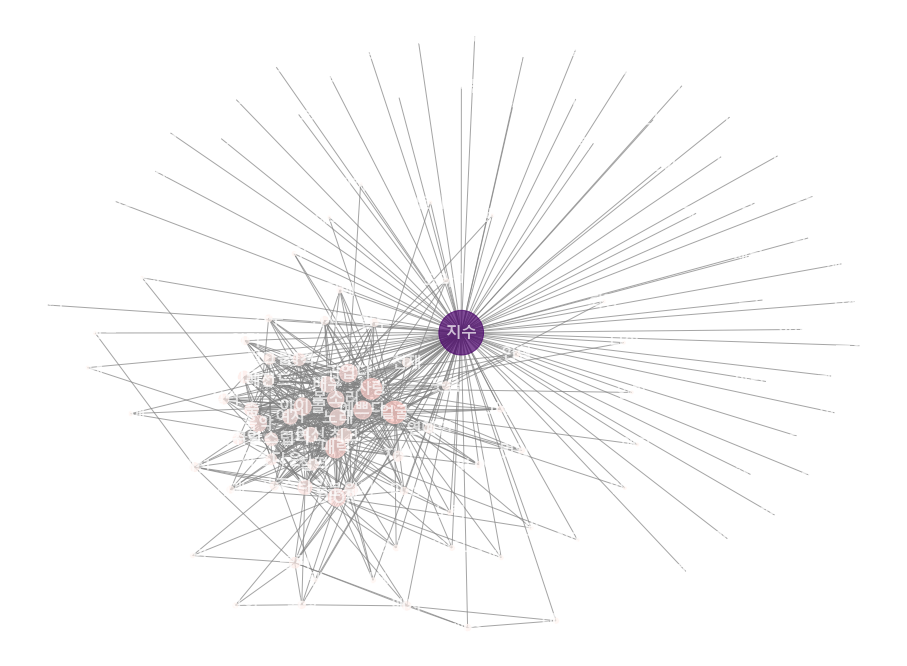

In [34]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.RdPu,
                font_color = 'white', font_weight = 'bold')

plt.savefig('./final_img/nt_jisu_top500_min1-w.png', bbox_inches = 'tight', transparent = True)
plt.show()


In [ ]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']